In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/BMW-M5-k/Datasets/main/weatherHistory.csv')
integer_columns = raw_data.select_dtypes(include=['float64']).columns
weather = raw_data[integer_columns].copy()
weather.drop(columns=weather.columns[6],inplace=True) #drop 'Loud Cover' as it has zeros

#Splitting the data into features and target

In [4]:
features = weather.iloc[:, [1,2,3,4,5,6]]
target = weather['Temperature (C)']

#Data Preprocessing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Fitting the Linear Regression model

In [11]:
regression_ml = LinearRegression()
regression_ml.fit(X_train_scaled, y_train)
reg_prediction = regression_ml.predict(X_test_scaled)

#Fitting the Random Forest Regression model

In [13]:
forest_ml = RandomForestRegressor()
forest_ml.fit(X_train_scaled, y_train)
forest_prediction = forest_ml.predict(X_test_scaled)

#Testing predicted data vs true data using mean squared error and R-squared score

In [12]:
linear_regression_error = mean_squared_error(y_test, reg_prediction)
print(f"Mean Squared Error for linear regression: {linear_regression_error}")
linear_regression_r2 = r2_score(y_test, reg_prediction)
print(f"R-squared score for linear regression: {linear_regression_r2}")

Mean Squared Error for linear regression: 0.8991261680520802
R-squared score for linear regression: 0.9902437799520607


In [9]:
random_forest_error = mean_squared_error(y_test, forest_prediction)
print(f"Mean Squared Error for Random Forest regression: {random_forest_error}")
random_forest_r2 = r2_score(y_test, forest_prediction)
print(f"R-squared score for Random Forest regression: {random_forest_r2}")

Mean Squared Error for Random Forest regression: 0.0020027546241098908
R-squared score for Random Forest regression: 0.9999782685506116


1. What type of machine learning problem is this?
- Supervised machine learning (Regression)

2. How do the features relate to each other and to the
weather conditions?
- Each feature has a direct or indirect influence on the weather conditions being predicted. For example, higher humidity and wind speed can affect how temperature is perceived and can contribute to different weather patterns.

3. What are the steps involved in preprocessing the
dataset for machine learning?
- Removing non-numerical values, splitting the data into training data and test data, scaling the data

4. How do we select the best model for our dataset?
- By trying out different models and testing for error,then selecting the model with the least error %

5. What metrics should we use to evaluate the
performance of our weather prediction model?
- Using metrics like mean squared error, absolute squared error, and R2 score

6. Plot the predicted vs true values
- The Random Forest regression came out as the best model to predict weather data in this dataset, and here is it's plot:

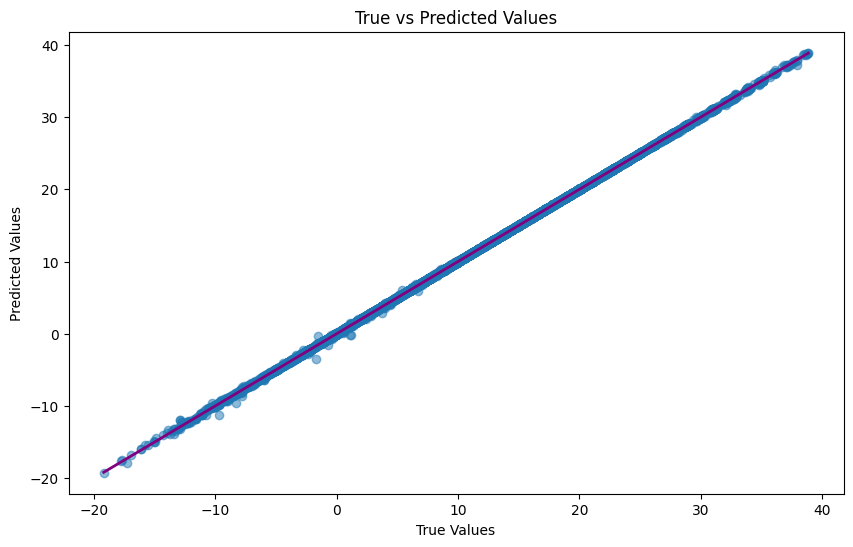

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, forest_prediction, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'purple', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()